In [144]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from desimodel.focalplane.geometry import FocalPlane

In [145]:
files = glob('/project/projectdirs/desi/spectro/redux/daily/exposures/20191030/00022981/sframe-*.fits')
hdus = [fits.open(f) for f in files]

In [146]:
for i in range(len(hdus[0])):
    print(hdus[0][i].header['EXTNAME'])

FLUX
IVAR
MASK
WAVELENGTH
RESOLUTION
FIBERMAP
CHI2PIX


In [119]:
hdus[0]['FLUX'].header['CAMERA']

'z3'

In [120]:
for hdu in hdus:
    wl = hdu['WAVELENGTH'].data
    print(wl[0], wl[-1])

7445.4 9823.8
5635.0 7731.0
3579.0 5934.2


In [207]:
np.diff(wl)

array([ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8])

In [141]:
for i in range(500):
    mag = ''
    for hdu in hdus:
        wl = hdu['WAVELENGTH'].data
        flux = hdu['FLUX'].data
#         mag = '{} {:12.3f}'.format(np.trapz(flux[i], wl))
        iflux = np.trapz(flux[i], wl)
        mag = '{} {:15.3f}'.format(mag, iflux)
    print('{:4d} {}'.format(i, mag))

   0         2822.195        2491.651       16278.321
   1          208.594         702.988       16026.581
   2         -652.960         265.140       11101.395
   3         -637.839         294.514       10559.284
   4          739.646        1006.895        6126.640
   5          700.752         726.568       15949.161
   6           30.975        1078.944        7911.948
   7          -58.111         709.052       12700.315
   8         3521.583        3175.305       13271.773
   9         -942.797        1298.337       11851.290
  10         -255.908        1263.480        7953.038
  11          354.280        1037.848       20721.305
  12          168.420        1127.218       10664.518
  13           40.298         699.357        8267.268
  14          539.518         817.951       11529.302
  15          327.477        1408.940       12764.914
  16          789.625         860.867       12783.217
  17          330.560         532.990        9839.834
  18         -774.042       

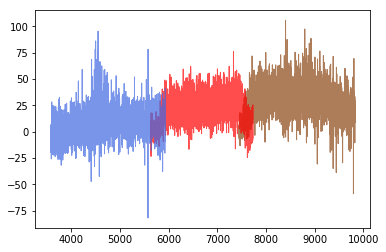

In [143]:
colors = {'b':'royalblue', 'r':'r', 'z':'saddlebrown'}
idx = 64

for hdu in hdus:
    wl = hdu['WAVELENGTH'].data
    cam = hdu['FLUX'].header['CAMERA']
    flux = hdu['FLUX'].data
    color = colors[cam[0].lower()]
    plt.plot(wl, flux[idx], color=color, lw=1, alpha=0.7)

In [122]:
wl = hdu['WAVELENGTH'].data
flux = hdu['FLUX'].data
ivar = hdu['IVAR'].data
res  = hdu['RESOLUTION'].data
chi2 = hdu['CHI2PIX'].data

In [123]:
hdu['FLUX'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2945                                                  
NAXIS2  =                  500                                                  
EXTEND  =                    T                                                  
EXTNAME = 'FLUX    '                                                            
INSTRUME= 'DESI    '           / Instrument name                                
PROCTYPE= 'RAW     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
PROGRAM = 'Raster test'        / Program name                                   
EXPID   =                22981 / Exposure number                                
EXPFRAME=                   

-1586.47 647.078 3579.0 5934.2


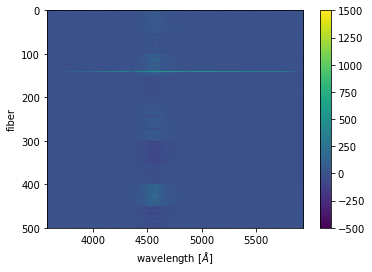

In [124]:
print(np.min(flux), np.max(flux), wl[0], wl[-1])
im = plt.imshow(flux, extent=[wl[0], wl[-1], 500, 0],
                aspect=4, vmin=-500, vmax=1500)
plt.xlabel('wavelength [$\AA$]')
plt.ylabel('fiber')
plt.colorbar(im)

In [33]:
fibermap = hdu['FIBERMAP'].data

In [44]:
fibermap.columns

ColDefs(
    name = 'TARGETID'; format = 'K'
    name = 'DESI_TARGET'; format = 'K'
    name = 'BGS_TARGET'; format = 'K'
    name = 'MWS_TARGET'; format = 'K'
    name = 'SECONDARY_TARGET'; format = 'K'
    name = 'TARGET_RA'; format = 'D'
    name = 'TARGET_DEC'; format = 'D'
    name = 'TARGET_RA_IVAR'; format = 'D'
    name = 'TARGET_DEC_IVAR'; format = 'D'
    name = 'BRICKID'; format = 'K'
    name = 'BRICK_OBJID'; format = 'K'
    name = 'MORPHTYPE'; format = '4A'
    name = 'PRIORITY'; format = 'J'
    name = 'SUBPRIORITY'; format = 'D'
    name = 'REF_ID'; format = 'K'
    name = 'PMRA'; format = 'E'
    name = 'PMDEC'; format = 'E'
    name = 'REF_EPOCH'; format = 'E'
    name = 'PMRA_IVAR'; format = 'E'
    name = 'PMDEC_IVAR'; format = 'E'
    name = 'RELEASE'; format = 'I'
    name = 'FLUX_G'; format = 'E'
    name = 'FLUX_R'; format = 'E'
    name = 'FLUX_Z'; format = 'E'
    name = 'FLUX_W1'; format = 'E'
    name = 'FLUX_W2'; format = 'E'
    name = 'FLUX_IVAR_G'; forma

In [206]:
fibermap['FIBER']

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

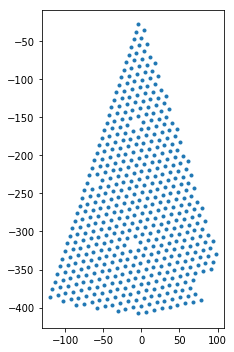

In [181]:
f(x, fy = [fibermap['FIBERASSIGN_{}'.format(val)] for val in ('X', 'Y')])
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(fx, fy, '.')
ax.set(aspect='equal')
fig.tight_layout()

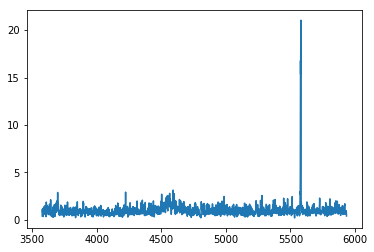

In [52]:
plt.plot(wl, chi2[9])

In [182]:
fplane = FocalPlane()

In [183]:
fplane.fiberpos[fibermap['FIBER']].columns

ColDefs(
    name = 'PETAL'; format = 'J'
    name = 'DEVICE'; format = 'J'
    name = 'DEVICE_TYPE'; format = '3A'
    name = 'LOCATION'; format = 'K'
    name = 'FIBER'; format = 'J'
    name = 'X'; format = 'D'; unit = 'mm'
    name = 'Y'; format = 'D'; unit = 'mm'
    name = 'Z'; format = 'D'; unit = 'mm'
    name = 'Q'; format = 'D'; unit = 'deg'
    name = 'S'; format = 'D'; unit = 'mm'
    name = 'SPECTRO'; format = 'J'
    name = 'SLIT'; format = 'J'
    name = 'SLITBLOCK'; format = 'K'
    name = 'BLOCKFIBER'; format = 'K'
)

In [184]:
x, y = [fplane.fiberpos[fibermap['FIBER']][val] for val in ('X', 'Y')]

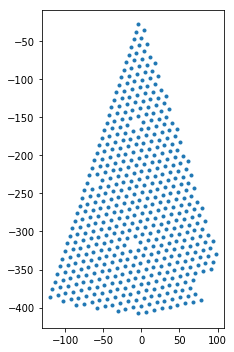

In [185]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(x, y, '.')
ax.set(aspect='equal')
fig.tight_layout()

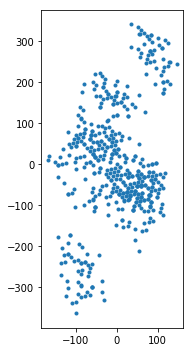

In [191]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(fx-x, fy-y, '.')
ax.set(aspect='equal')
fig.tight_layout()

In [196]:
np.sort(x) - np.sort(fx)

array([  3.59713827e-06,   2.11836539e-06,   8.43731797e-07,
        -3.27119697e-06,   5.75025339e-07,  -3.29567668e-06,
        -1.66778663e-06,   1.55115657e-06,   6.36504112e-07,
        -2.83325198e-06,   1.42261919e-06,  -1.79992669e-06,
         2.14984424e-06,   3.21255058e-06,  -2.62879843e-06,
        -2.67093171e-07,   1.43410938e-06,   1.87446052e-06,
        -1.29665837e-06,  -3.29573510e-06,   1.46356881e-06,
         5.33274644e-07,  -1.04743944e-06,  -3.35546551e-06,
        -3.14105583e-06,  -2.83506670e-06,   2.62079554e-06,
         1.59874817e-06,   3.55945269e-06,  -3.71288193e-06,
        -3.76602581e-06,  -7.08806652e-07,  -3.78801747e-06,
         3.71381350e-06,   3.20826997e-06,  -2.32463321e-07,
        -5.53258985e-07,  -3.01675286e-06,   4.54253609e-07,
         1.00177407e-06,  -3.32377472e-06,  -2.18545064e-06,
        -3.59842407e-06,  -1.19294771e-06,   2.80595117e-07,
         2.97442766e-06,  -1.12923594e-06,   1.01614322e-06,
        -2.15624641e-06,

In [220]:
skycount = [0,0,0,0]

for i in range(500):
    s = 'Fiber {:3d} - '.format(i)
    sky = 0
    for hdu in hdus:
        camera = hdu['FLUX'].header['CAMERA']
        fibermap = hdu['FIBERMAP'].data
        obj = fibermap['OBJTYPE'][i]
        if obj == 'SKY':
            sky += 1
        s = '{:s} {:2s}:{:3s} '.format(s, camera, obj)
    skycount[sky] += 1
    print(s)

print(skycount)

Fiber   0 -  z3:     r3:     b3:SKY 
Fiber   1 -  z3:     r3:     b3:    
Fiber   2 -  z3:     r3:SKY  b3:    
Fiber   3 -  z3:     r3:     b3:    
Fiber   4 -  z3:     r3:     b3:SKY 
Fiber   5 -  z3:     r3:     b3:SKY 
Fiber   6 -  z3:     r3:     b3:    
Fiber   7 -  z3:SKY  r3:SKY  b3:    
Fiber   8 -  z3:     r3:     b3:    
Fiber   9 -  z3:     r3:     b3:SKY 
Fiber  10 -  z3:     r3:     b3:    
Fiber  11 -  z3:     r3:SKY  b3:    
Fiber  12 -  z3:     r3:     b3:    
Fiber  13 -  z3:     r3:     b3:SKY 
Fiber  14 -  z3:     r3:     b3:    
Fiber  15 -  z3:SKY  r3:     b3:    
Fiber  16 -  z3:     r3:SKY  b3:    
Fiber  17 -  z3:     r3:     b3:    
Fiber  18 -  z3:SKY  r3:     b3:    
Fiber  19 -  z3:     r3:     b3:    
Fiber  20 -  z3:SKY  r3:     b3:SKY 
Fiber  21 -  z3:SKY  r3:     b3:    
Fiber  22 -  z3:     r3:     b3:    
Fiber  23 -  z3:     r3:     b3:    
Fiber  24 -  z3:     r3:     b3:    
Fiber  25 -  z3:     r3:     b3:    
Fiber  26 -  z3:     r3:     b3:SKY 
F

In [224]:
0.33 * 500

165.0